# Análisis por clientes

En este notebook vamos a realizar un Análisis Exploratorio de datos (EDA) tomando como base los clientes de nuestro dataframe. Es importante señalar que la empresa solo tiene datos de los diferentes clientes del almacen, la tienda física e online, solo tienen ventas generales, no les dan importancia a los clientes por separado. En cada uno de los análisas vamos a dar una observación y terminar con unas conclusiones. 

In [1]:
#LIBRERIAS USADAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#LEEMOS EL ARCHIVO CSV O SEA EL DATAFRAME UNIDO Y LIMPIO
tienda = pd.read_csv('tienda.csv')
tipos_de_datos = {
    'ID_PRODUCTO': 'object',
    'NOMBRE_PRODUCTO': 'object',
    'FECHA_COMPRA': 'datetime64[ns]',
    'CANAL_VENTA': 'object',
    'CADUCIDAD': 'datetime64[ns]',
    'CANTIDAD': 'float64',
    'PRECIO_UNIDAD': 'float64',
    'PRECIO_TOTAL': 'float64',
    'INDEX_CLIENTES': 'int32',
    'ETIQUETA_CANAL': 'int64',
    'CATEGORIA': 'object',
    'PROVEEDOR': 'object',
    'UNIDADES_VENDIDAS': 'object'
}
tienda = tienda.astype(tipos_de_datos)
tienda['mes'] = tienda['FECHA_COMPRA'].dt.month
tienda['año'] = tienda['FECHA_COMPRA'].dt.year

C:\Users\heuni\AppData\Local\Temp\ipykernel_30832\204629554.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  tienda = pd.read_csv('tienda.csv')


## Análisis de clientes por tiempo y categoría

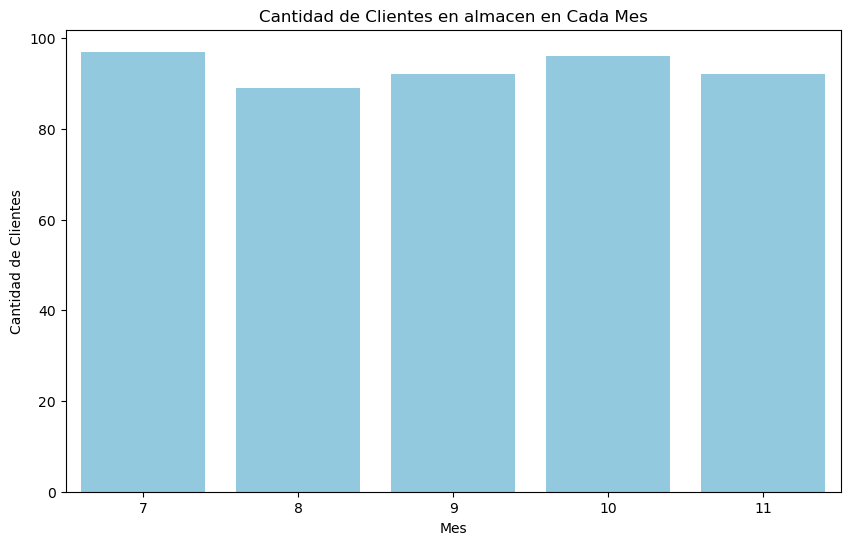

In [4]:
clientes_canal_3 = tienda[tienda['ETIQUETA_CANAL'] == 3].copy()  
clientes_canal_3.loc[:, 'MES'] = clientes_canal_3['FECHA_COMPRA'].dt.month 
clientes_por_mes = clientes_canal_3.groupby('MES')['INDEX_CLIENTES'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=clientes_por_mes.index, y=clientes_por_mes.values, color='skyblue')
plt.title('Cantidad de Clientes en almacen en Cada Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Clientes')
plt.show()

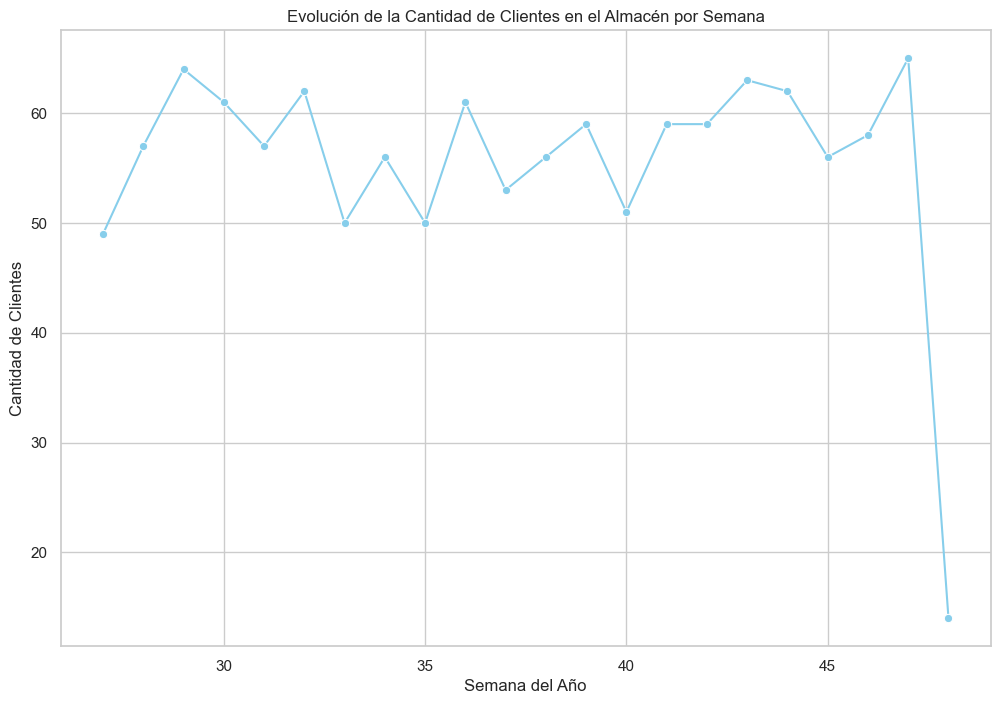

In [18]:
clientes_canal_3 = tienda[tienda['ETIQUETA_CANAL'] == 3].copy()  
clientes_canal_3.loc[:, 'SEMANA'] = clientes_canal_3['FECHA_COMPRA'].dt.isocalendar().week
clientes_por_semana = clientes_canal_3.groupby('SEMANA')['INDEX_CLIENTES'].nunique()
clientes_por_semana = clientes_por_semana.replace([np.inf, -np.inf], np.nan)
clientes_por_semana = clientes_por_semana.dropna()

plt.figure(figsize=(12, 8))
sns.lineplot(x=clientes_por_semana.index.astype(int), y=clientes_por_semana.values, marker='o', color='skyblue')
plt.title('Evolución de la Cantidad de Clientes en el Almacén por Semana')
plt.xlabel('Semana del Año')
plt.ylabel('Cantidad de Clientes')
plt.show()

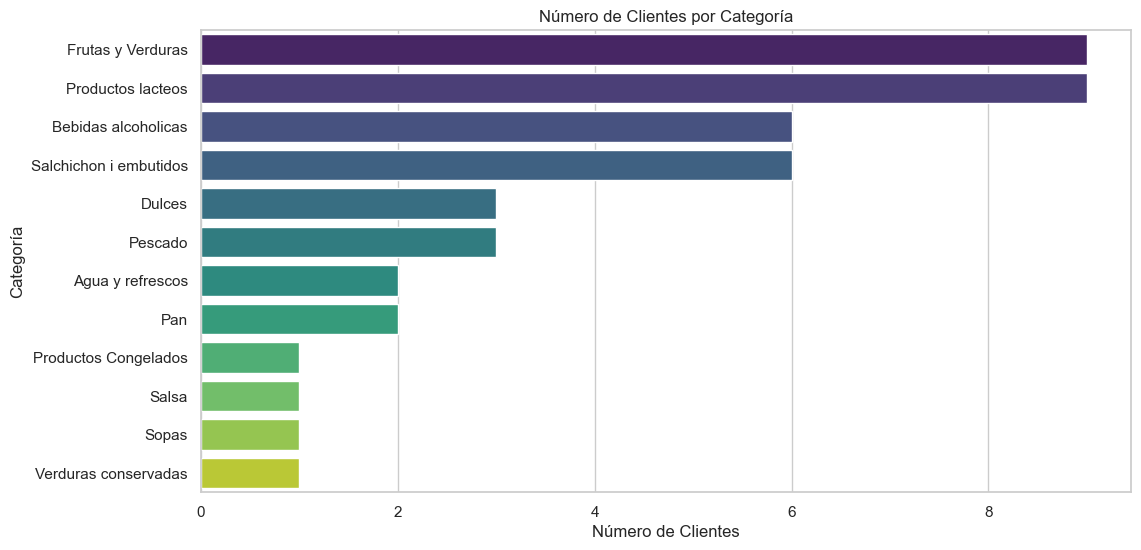

In [28]:
tienda_filtered = tienda[tienda['INDEX_CLIENTES'] == 3]
clientes_por_categoria = tienda_filtered['CATEGORIA'].value_counts().reset_index()
clientes_por_categoria.columns = ['CATEGORIA', 'NUM_CLIENTES']
clientes_por_categoria = clientes_por_categoria.sort_values(by='NUM_CLIENTES', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='NUM_CLIENTES', y='CATEGORIA', data=clientes_por_categoria, palette='viridis')
plt.title('Número de Clientes por Categoría')
plt.xlabel('Número de Clientes')
plt.ylabel('Categoría')
plt.show()

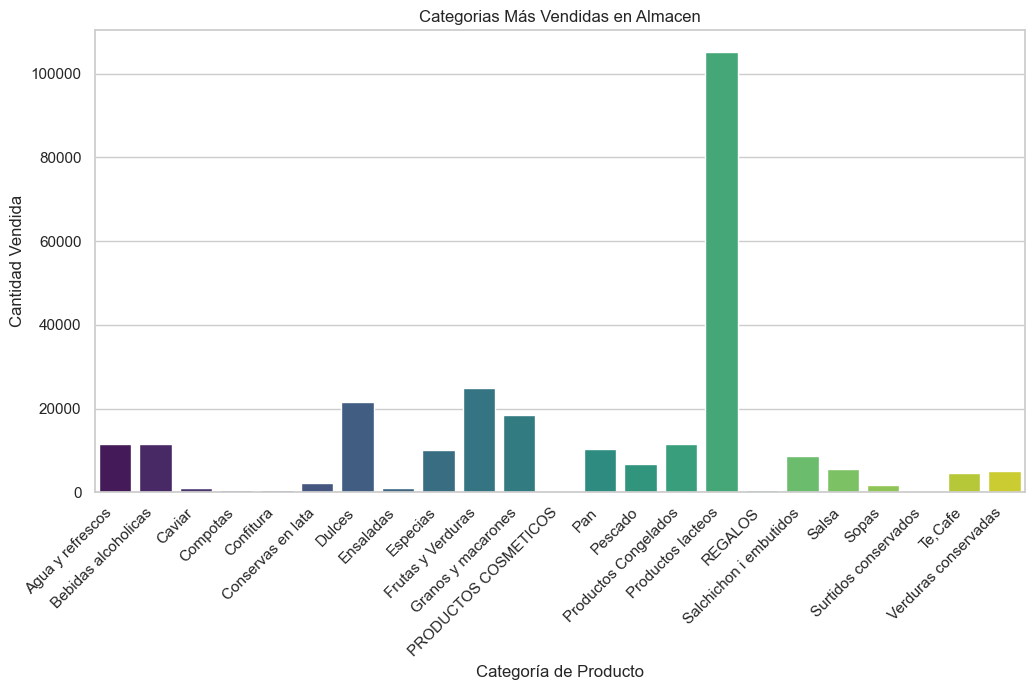

In [7]:
#LAS CATEGORIAS MAS SOLICITADAS DE LOS CLIENTES DE ALMACEN
df_canal_3 = tienda[tienda['ETIQUETA_CANAL'] == 3]
ventas_por_categoria = df_canal_3.groupby('CATEGORIA')['CANTIDAD'].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='CATEGORIA', y='CANTIDAD', data=ventas_por_categoria, palette='viridis')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Categorias Más Vendidas en Almacen')
plt.xticks(rotation=45, ha='right')
plt.show()

## Observaciones
Se puede observar las catidad de clientes que hubo a lo largo de las semanas, las categorías que más clientes tienen son frutas y verduras y productos lácteos. 

## Análisis de clientes por ingresos generados 

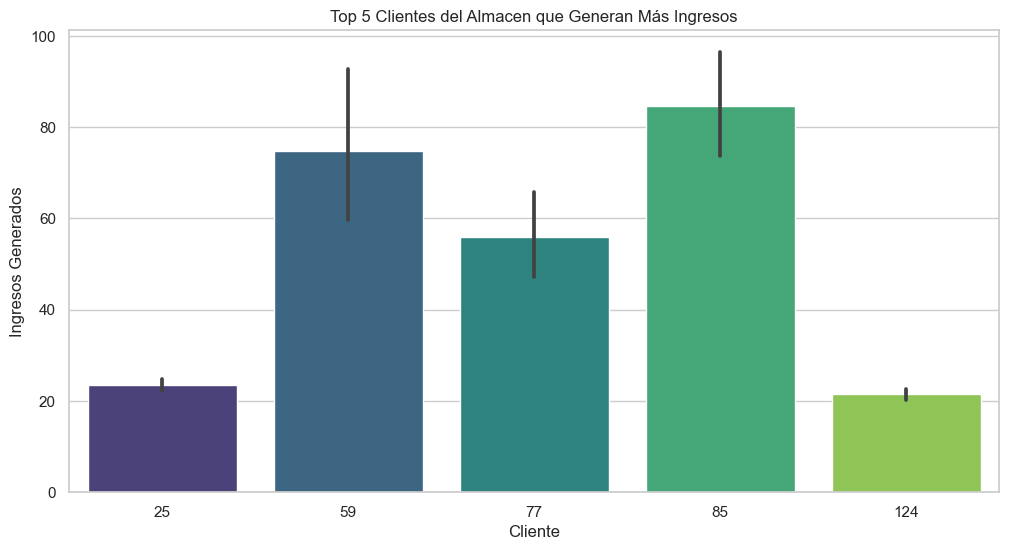

In [8]:
#LOS CLIENTES QUE GENERAN MAS INGRESOS
df_canal_3 = tienda[tienda['ETIQUETA_CANAL'] == 3]
top5_clientes_canal_3 = df_canal_3.groupby('INDEX_CLIENTES')['PRECIO_TOTAL'].sum().reset_index().nlargest(5, 'PRECIO_TOTAL')['INDEX_CLIENTES']
df_top5_clientes_canal_3 = df_canal_3[df_canal_3['INDEX_CLIENTES'].isin(top5_clientes_canal_3)]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='INDEX_CLIENTES', y='PRECIO_TOTAL', data=df_top5_clientes_canal_3, palette='viridis')
plt.xlabel('Cliente')
plt.ylabel('Ingresos Generados')
plt.title('Top 5 Clientes del Almacen que Generan Más Ingresos')
plt.show()

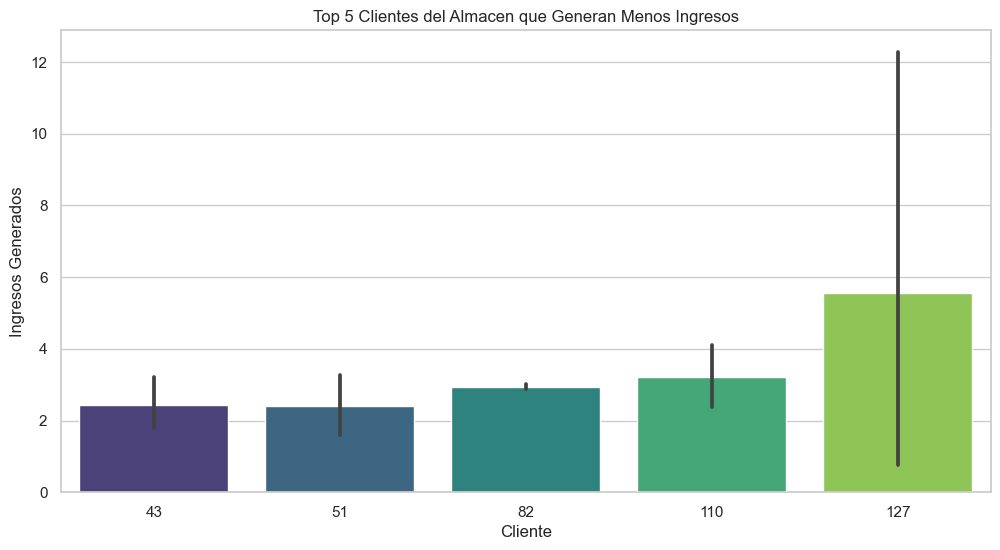

In [9]:
#LOS CLIENTES QUE GENERAN MENOS INGRESOS
bottom5_clientes_canal_3 = df_canal_3.groupby('INDEX_CLIENTES')['PRECIO_TOTAL'].sum().reset_index().nsmallest(5, 'PRECIO_TOTAL')['INDEX_CLIENTES']
df_bottom5_clientes_canal_3 = df_canal_3[df_canal_3['INDEX_CLIENTES'].isin(bottom5_clientes_canal_3)]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='INDEX_CLIENTES', y='PRECIO_TOTAL', data=df_bottom5_clientes_canal_3, palette='viridis')
plt.xlabel('Cliente')
plt.ylabel('Ingresos Generados')
plt.title('Top 5 Clientes del Almacen que Generan Menos Ingresos')
plt.show()

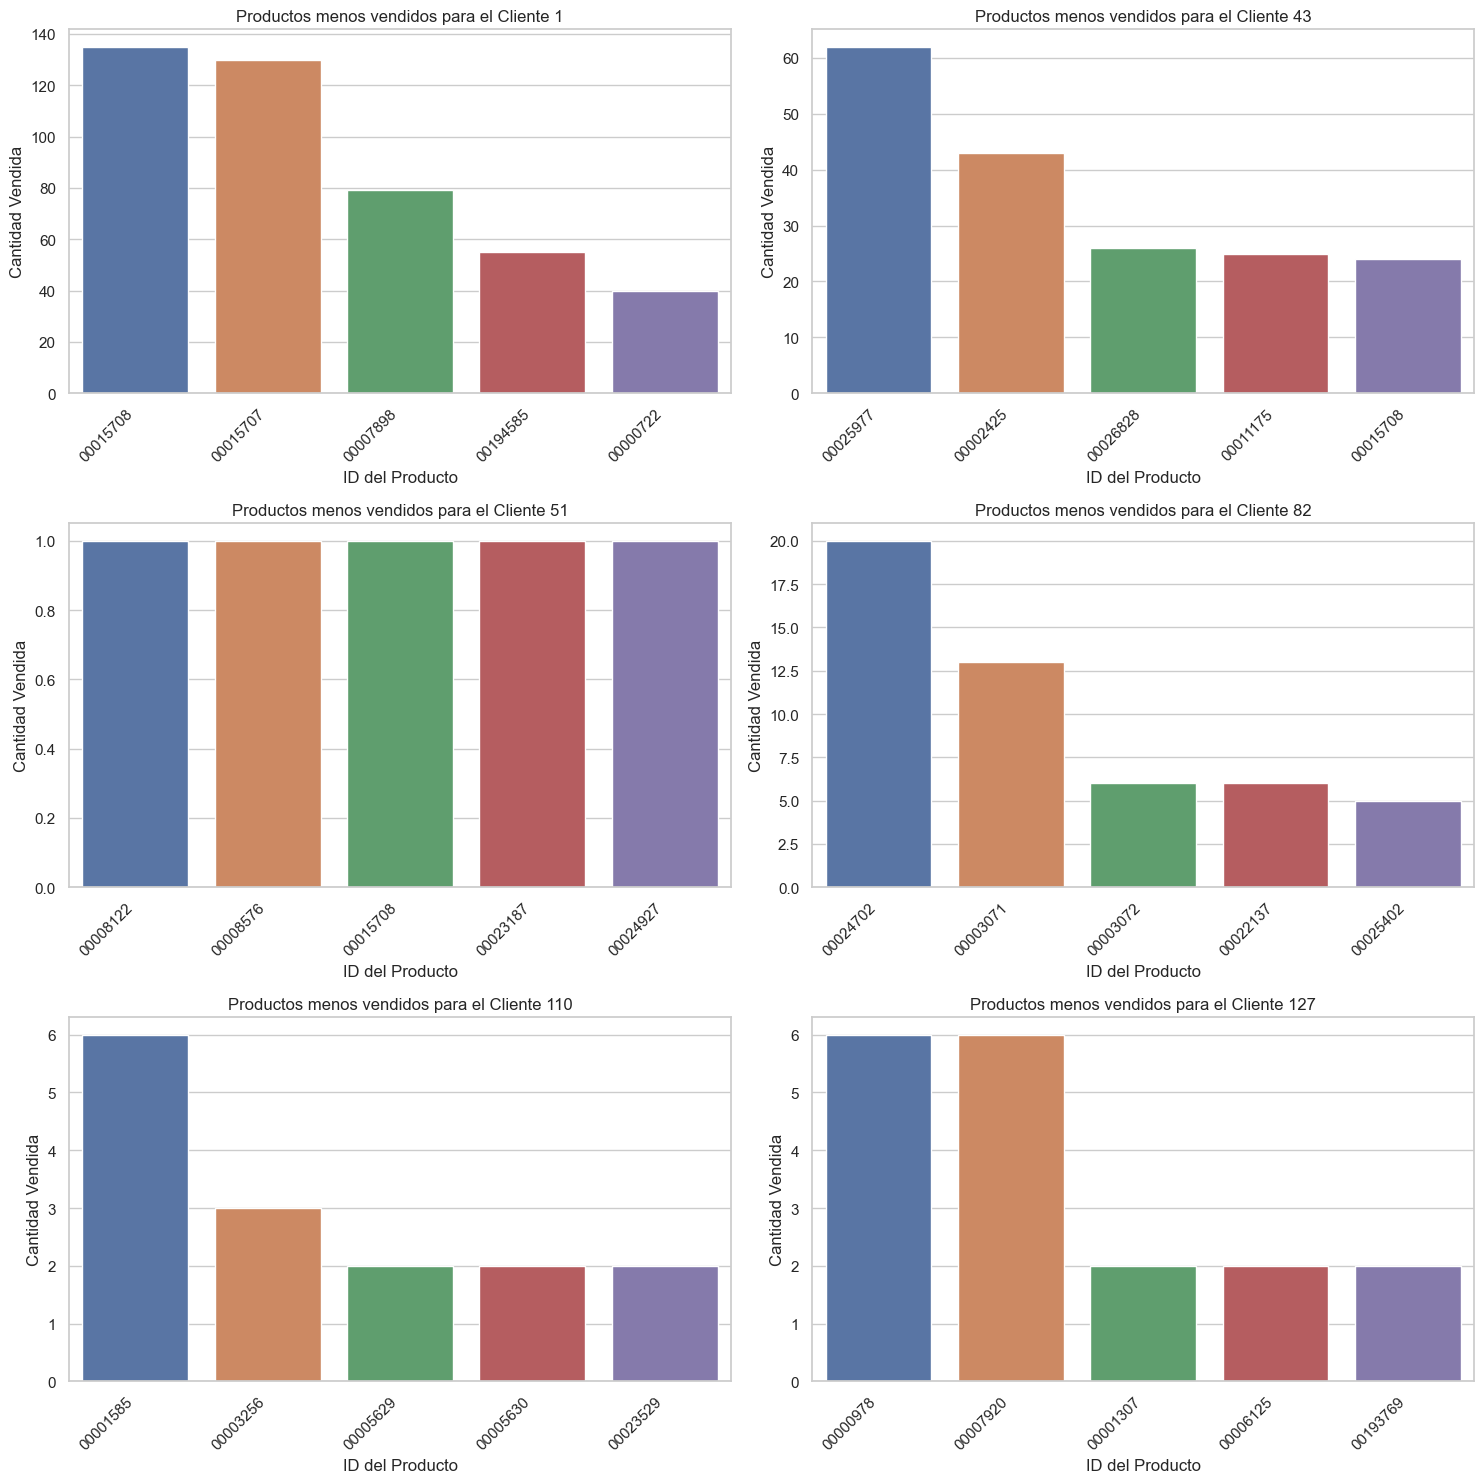

In [55]:
#LOS PRODUCTOS MAS COMPRADOS DE LOS CLIENTES CON MENOS RENTABILIDAD
canal_3_df = tienda[tienda['ETIQUETA_CANAL'] == 3]
clientes_menos_rentables = canal_3_df.groupby('INDEX_CLIENTES')['PRECIO_TOTAL'].sum().nsmallest(6).index
ventas_clientes_menos_rentables = tienda[tienda['INDEX_CLIENTES'].isin(clientes_menos_rentables)]
resultados = ventas_clientes_menos_rentables.groupby(['INDEX_CLIENTES', 'ID_PRODUCTO'])['CANTIDAD'].sum().reset_index()
resultados = resultados.sort_values(['INDEX_CLIENTES', 'CANTIDAD'], ascending=[True, False])
resultados_top5 = resultados.groupby('INDEX_CLIENTES').head(5)
num_clientes = len(resultados_top5['INDEX_CLIENTES'].unique())
fig, axes = plt.subplots(num_clientes // 2, 2, figsize=(15, 5 * (num_clientes // 2)))
for i, cliente in enumerate(resultados_top5['INDEX_CLIENTES'].unique()):
    datos_cliente = resultados_top5[resultados_top5['INDEX_CLIENTES'] == cliente]
    sns.barplot(x='ID_PRODUCTO', y='CANTIDAD', data=datos_cliente, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Productos menos vendidos para el Cliente {cliente}')
    axes[i // 2, i % 2].set_xlabel('ID del Producto')
    axes[i // 2, i % 2].set_ylabel('Cantidad Vendida')
    axes[i // 2, i % 2].set_xticklabels(datos_cliente['ID_PRODUCTO'], rotation=45, ha='right')

# Ajustar diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

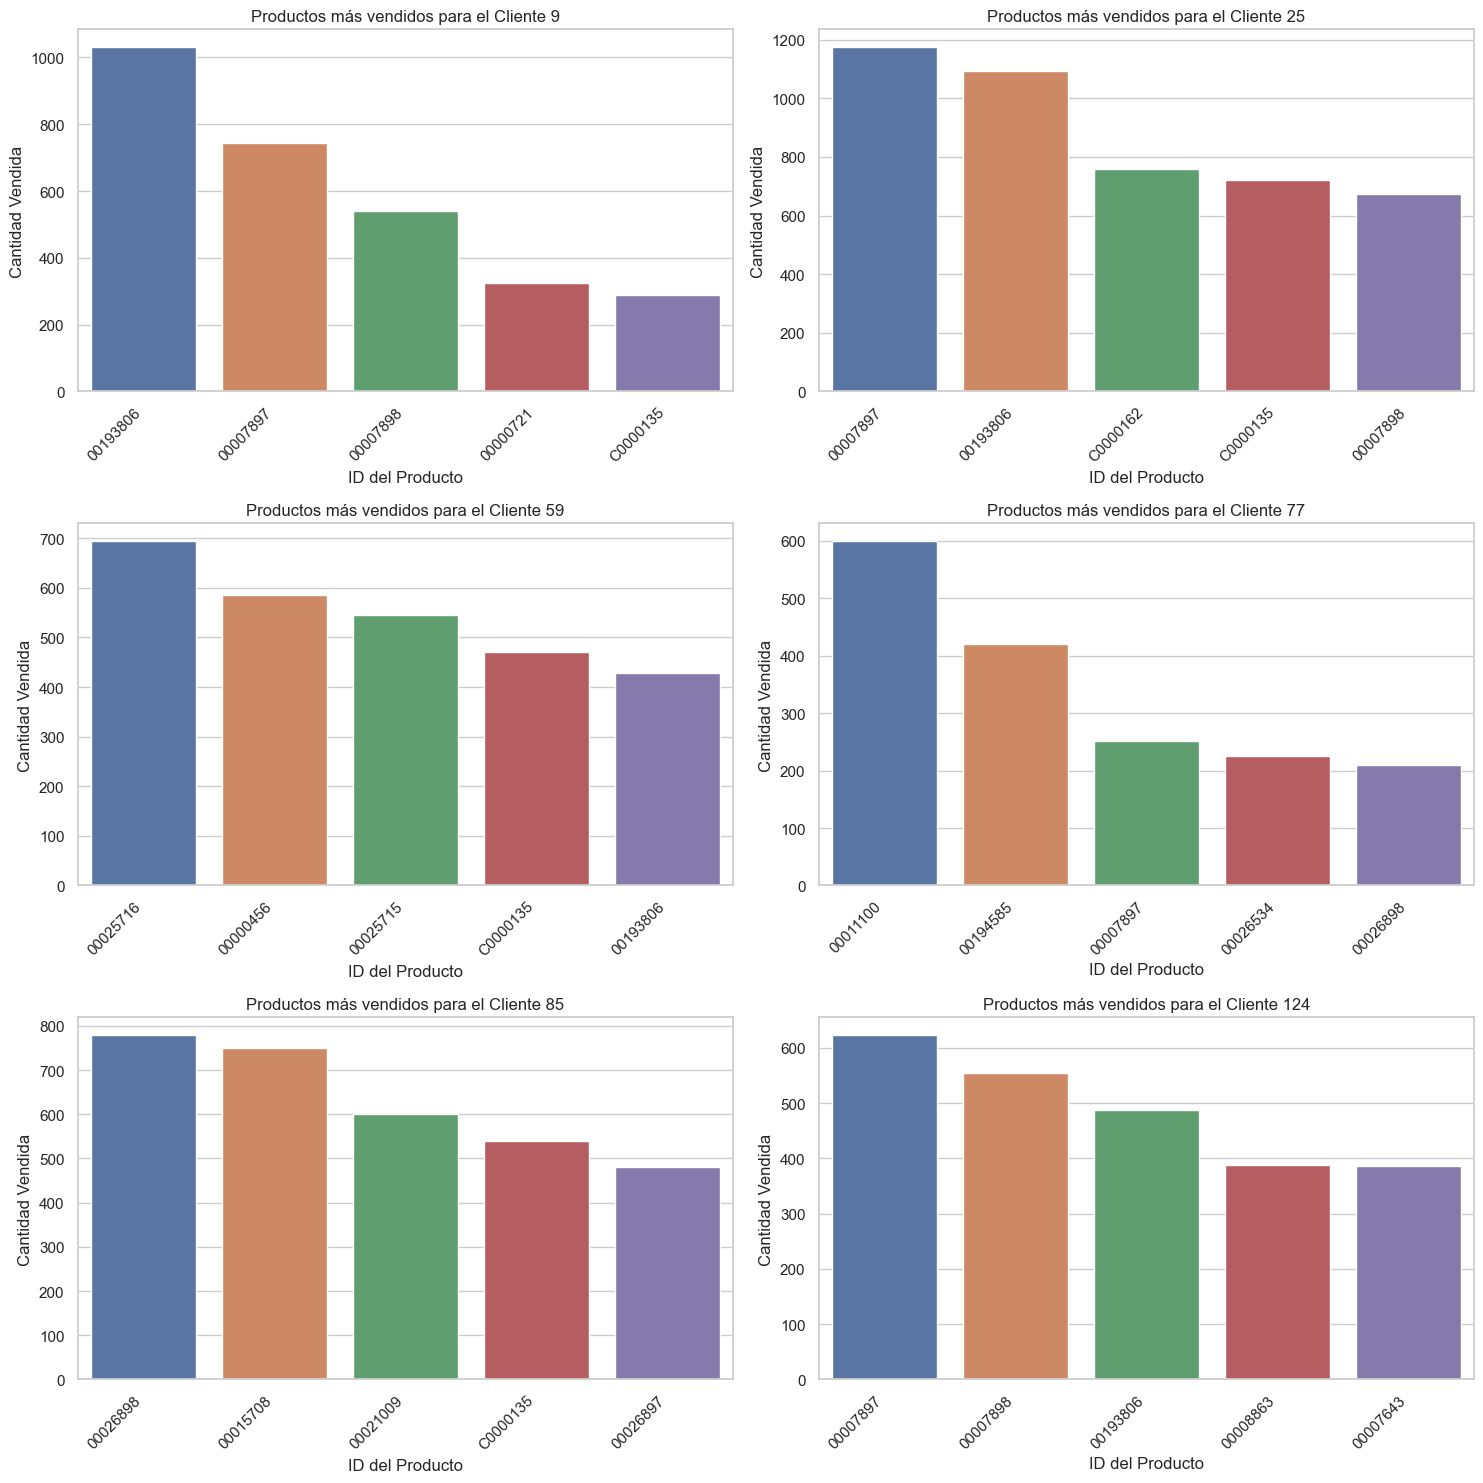

In [54]:
canal_3_df = tienda[tienda['ETIQUETA_CANAL'] == 3]
clientes_mas_rentables = canal_3_df.groupby('INDEX_CLIENTES')['PRECIO_TOTAL'].sum().nlargest(6).index
ventas_clientes_mas_rentables = tienda[tienda['INDEX_CLIENTES'].isin(clientes_mas_rentables)]
resultados = ventas_clientes_mas_rentables.groupby(['INDEX_CLIENTES', 'ID_PRODUCTO'])['CANTIDAD'].sum().reset_index()
resultados = resultados.sort_values(['INDEX_CLIENTES', 'CANTIDAD'], ascending=[True, False])

resultados_top5 = resultados.groupby('INDEX_CLIENTES').head(5)
num_clientes = len(resultados_top5['INDEX_CLIENTES'].unique())
fig, axes = plt.subplots(num_clientes // 2, 2, figsize=(15, 5 * (num_clientes // 2)))
for i, cliente in enumerate(resultados_top5['INDEX_CLIENTES'].unique()):
    datos_cliente = resultados_top5[resultados_top5['INDEX_CLIENTES'] == cliente]
    sns.barplot(x='ID_PRODUCTO', y='CANTIDAD', data=datos_cliente, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Productos más vendidos para el Cliente {cliente}')
    axes[i // 2, i % 2].set_xlabel('ID del Producto')
    axes[i // 2, i % 2].set_ylabel('Cantidad Vendida')
    axes[i // 2, i % 2].set_xticklabels(datos_cliente['ID_PRODUCTO'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

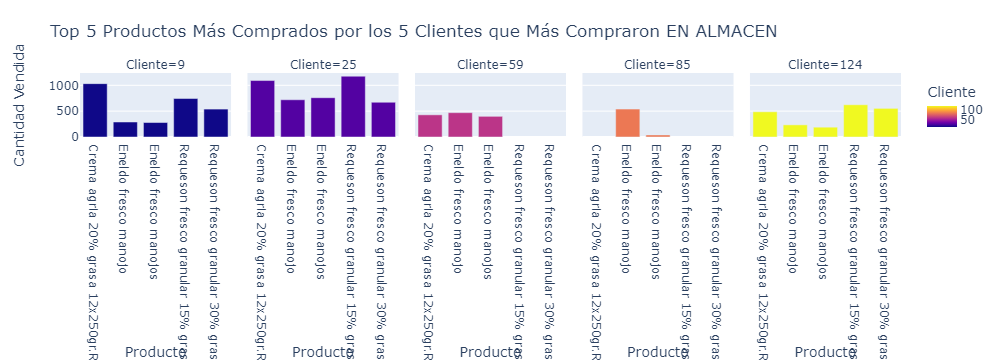

In [13]:
tienda['FECHA_COMPRA'] = pd.to_datetime(tienda['FECHA_COMPRA'])

# Filtrar las transacciones con ETIQUETA_CANAL 3
tienda_canal_3 = tienda[tienda['ETIQUETA_CANAL'] == 3]

# Identificar los 5 clientes que más compraron con ETIQUETA_CANAL 3
clientes_top_5_canal_3 = tienda_canal_3.groupby('INDEX_CLIENTES')['CANTIDAD'].sum().nlargest(5).index

# Filtrar las transacciones de los 5 clientes con ETIQUETA_CANAL 3
transacciones_top_5_canal_3 = tienda_canal_3[tienda_canal_3['INDEX_CLIENTES'].isin(clientes_top_5_canal_3)]

# Agrupar por cliente y producto, sumar la cantidad vendida
ventas_por_cliente_producto = transacciones_top_5_canal_3.groupby(['INDEX_CLIENTES', 'NOMBRE_PRODUCTO'])['CANTIDAD'].sum().reset_index()

# Seleccionar los 5 productos más comprados en total
top_5_productos = ventas_por_cliente_producto.groupby('NOMBRE_PRODUCTO')['CANTIDAD'].sum().nlargest(5).index

# Filtrar las transacciones solo para los 5 productos más comprados para cada cliente
ventas_top_5_productos = ventas_por_cliente_producto[ventas_por_cliente_producto['NOMBRE_PRODUCTO'].isin(top_5_productos)]

# Crear el gráfico de barras con Plotly Express
fig = px.bar(ventas_top_5_productos, x='NOMBRE_PRODUCTO', y='CANTIDAD', color='INDEX_CLIENTES',
             title='Top 5 Productos Más Comprados por los 5 Clientes que Más Compraron EN ALMACEN',
             labels={'CANTIDAD': 'Cantidad Vendida', 'NOMBRE_PRODUCTO': 'Producto', 'INDEX_CLIENTES': 'Cliente'},
             facet_col='INDEX_CLIENTES', facet_col_wrap=5)

# Mostrar el gráfico
fig.show()


## Clientes recurrentes

In [38]:
clientes_por_mes = tienda.groupby('INDEX_CLIENTES')['mes'].nunique().reset_index()
clientes_por_mes.columns = ['INDEX_CLIENTES', 'Meses_Compra']
clientes_por_semana = tienda.groupby('INDEX_CLIENTES')['FECHA_COMPRA'].agg(lambda x: (x.max() - x.min()).days // 7).reset_index()
clientes_por_semana.columns = ['INDEX_CLIENTES', 'Semanas_Compra']
clientes_mas_de_un_mes_con_semanas = pd.merge(clientes_mas_de_un_mes, clientes_por_semana, on='INDEX_CLIENTES', how='left')
clientes_mas_de_un_mes_con_semanas = clientes_mas_de_un_mes_con_semanas.sort_values(by='Semanas_Compra', ascending=False)
clientes_mas_de_un_mes_con_semanas

INDEX_CLIENTES  Meses_Compra  Semanas_Compra
53               59             5              20
25               26             5              20
27               28             5              20
29               30             5              20
99              123             5              20
..              ...           ...             ...
0                 0             2               3
106             137             2               3
55               64             2               2
30               31             2               2
85              102             2               1

[107 rows x 3 columns]

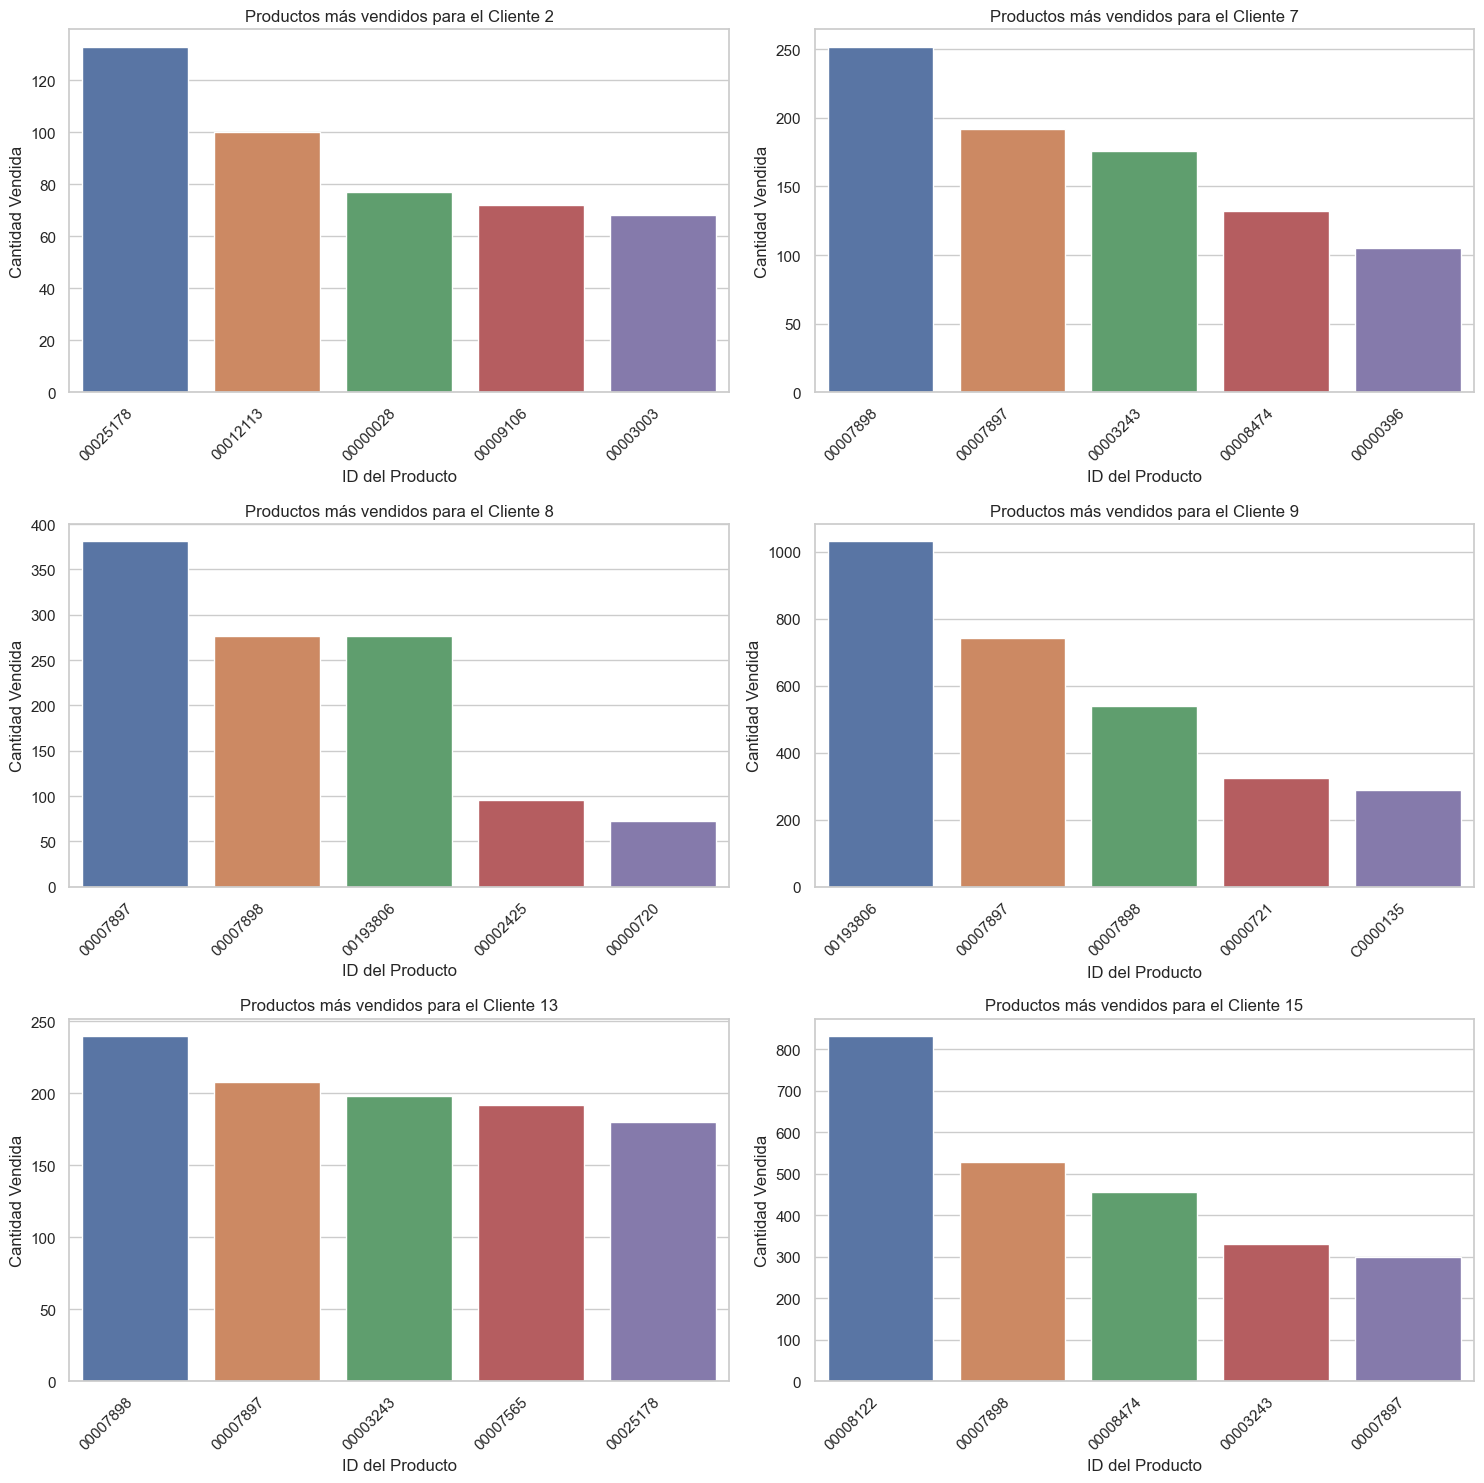

In [51]:
canal_3_df = tienda[tienda['ETIQUETA_CANAL'] == 3]
clientes_mas_semanas = canal_3_df.groupby('INDEX_CLIENTES')['FECHA_COMPRA'].agg(lambda x: (x.max() - x.min()).days // 7).nlargest(6).index
ventas_clientes_mas_semanas = tienda[tienda['INDEX_CLIENTES'].isin(clientes_mas_semanas)]

resultados = ventas_clientes_mas_semanas.groupby(['INDEX_CLIENTES', 'ID_PRODUCTO'])['CANTIDAD'].sum().reset_index()
resultados = resultados.sort_values(['INDEX_CLIENTES', 'CANTIDAD'], ascending=[True, False])
resultados_top5 = resultados.groupby('INDEX_CLIENTES').head(5)
num_clientes = len(resultados_top5['INDEX_CLIENTES'].unique())
fig, axes = plt.subplots(num_clientes // 2, 2, figsize=(15, 5 * (num_clientes // 2)))
for i, cliente in enumerate(resultados_top5['INDEX_CLIENTES'].unique()):
    datos_cliente = resultados_top5[resultados_top5['INDEX_CLIENTES'] == cliente]
    sns.barplot(x='ID_PRODUCTO', y='CANTIDAD', data=datos_cliente, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Productos más vendidos para el Cliente {cliente}')
    axes[i // 2, i % 2].set_xlabel('ID del Producto')
    axes[i // 2, i % 2].set_ylabel('Cantidad Vendida')
    axes[i // 2, i % 2].set_xticklabels(datos_cliente['ID_PRODUCTO'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

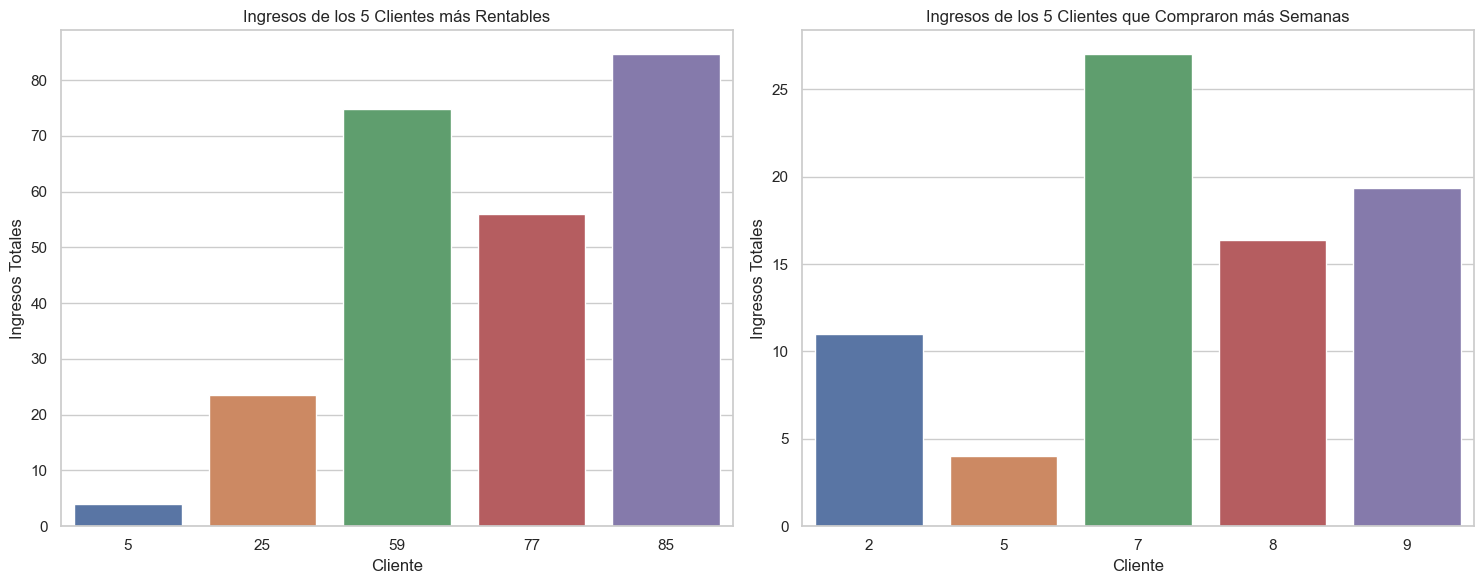

In [47]:
clientes_mas_rentables = tienda.groupby('INDEX_CLIENTES')['PRECIO_TOTAL'].sum().nlargest(5).index
ventas_clientes_mas_rentables = tienda[tienda['INDEX_CLIENTES'].isin(clientes_mas_rentables)]
clientes_mas_semanas = tienda.groupby('INDEX_CLIENTES')['FECHA_COMPRA'].agg(lambda x: (x.max() - x.min()).days // 7).nlargest(5).index
ventas_clientes_mas_semanas = tienda[tienda['INDEX_CLIENTES'].isin(clientes_mas_semanas)]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='INDEX_CLIENTES', y='PRECIO_TOTAL', data=ventas_clientes_mas_rentables, errorbar=None, ax=axes[0])
axes[0].set_title('Ingresos de los 5 Clientes más Rentables')
axes[0].set_xlabel('Cliente')
axes[0].set_ylabel('Ingresos Totales')

sns.barplot(x='INDEX_CLIENTES', y='PRECIO_TOTAL', data=ventas_clientes_mas_semanas, errorbar=None, ax=axes[1])
axes[1].set_title('Ingresos de los 5 Clientes que Compraron más Semanas')
axes[1].set_xlabel('Cliente')
axes[1].set_ylabel('Ingresos Totales')
plt.tight_layout()
plt.show()

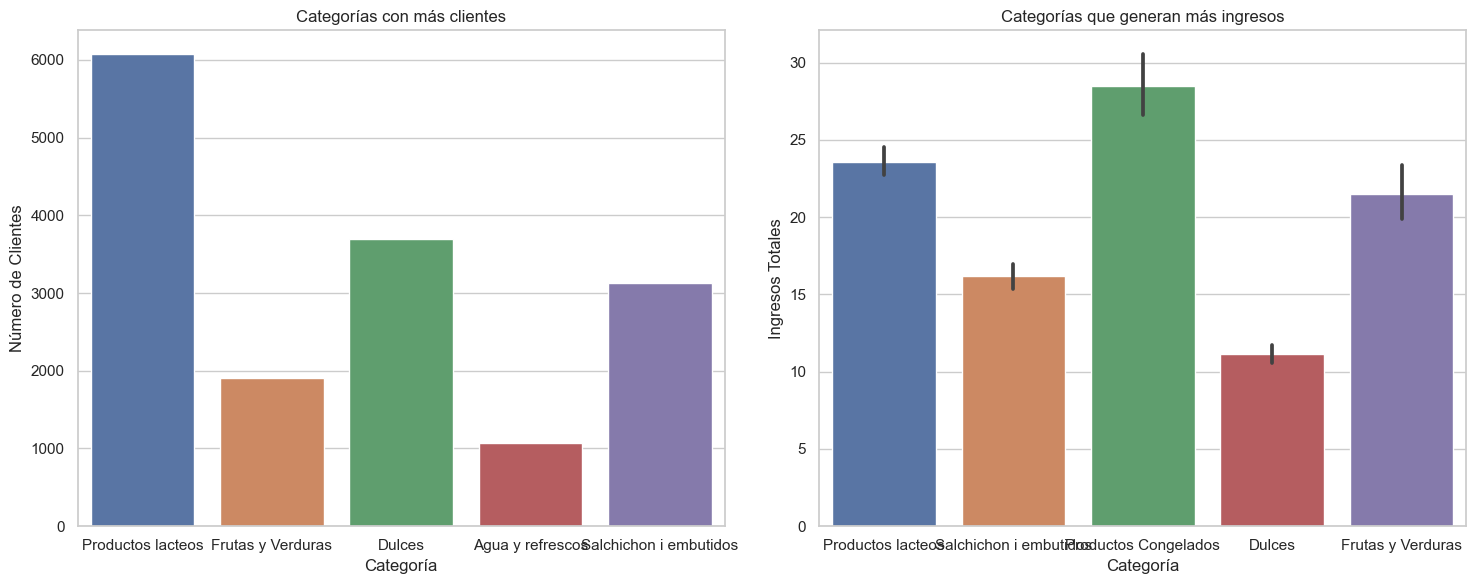

In [61]:
canal_3_df = tienda[tienda['ETIQUETA_CANAL'] == 3]
categorias_mas_clientes = canal_3_df.groupby('CATEGORIA')['INDEX_CLIENTES'].nunique().nlargest(5).index
clientes_por_categoria = canal_3_df[canal_3_df['CATEGORIA'].isin(categorias_mas_clientes)]
categorias_mas_ingresos = canal_3_df.groupby('CATEGORIA')['PRECIO_TOTAL'].sum().nlargest(5).index
ingresos_por_categoria = canal_3_df[canal_3_df['CATEGORIA'].isin(categorias_mas_ingresos)]
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='CATEGORIA', data=clientes_por_categoria, order=categorias_mas_clientes, ax=axes[0])
axes[0].set_title('Categorías con más clientes')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Número de Clientes')
sns.barplot(x='CATEGORIA', y='PRECIO_TOTAL', data=ingresos_por_categoria, order=categorias_mas_ingresos, ax=axes[1])
axes[1].set_title('Categorías que generan más ingresos')
axes[1].set_xlabel('Categoría')
axes[1].set_ylabel('Ingresos Totales')
plt.tight_layout()
plt.show()

## Observaciones 
Podemos obervar la tendencia que tienen los clientes para regresar al almacen, pero la mayoría de los clientes que visitan más la tienda no son los que más ingresos generan. 

## Conclusiones
Hay muchos clientes que son fiables, de los 141 clientes que tenemos en total, 107 han venido al menos dos semanas y varios vinieron casi todas las semanas. No hay una relación entre los clientes que más ingresos generan y los que más visitas semanales hacen. También se puede observar que las categorías que más ingresos generan no son todas las que más clientes tiene. Es importante destacar que el numero de clientes también es un problema al momento de generar los modelos por lo que sería importante que la empresa consiga más datos de clientes y también haga una separación de clientes en tienda online y física para saber los comportamientos de los clientes recurrentes. Estos últimos datos puede resultar útil para crear los modelos de recomendación de productos